<a href="https://colab.research.google.com/github/nirmal-ank/GNN/blob/main/IntroductionToGraphs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install torch_geometric

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 63.1/63.1 kB 2.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 12.3 MB/s eta 0:00:00


In [2]:
pip install sentence_transformers

In [3]:
pip install matplotlib pandas scikit-learn

Importing Libraries

In [4]:
import torch
import random
import networkx as nx #visualize the graph
import matplotlib.pyplot as plt

Ref-doc-link-
https://pytorch-geometric.readthedocs.io/en/latest/get_started/introduction.html#data-handling-of-graphs

Showing a simple example of an unweighted and undirected graph with 3 nodes and 2 edges. Each node contains a single feature

In [5]:
from torch_geometric.data import Data

edge_index = torch.tensor([[0, 1, 1, 2],
                           [1, 0, 2, 1]], dtype = torch.long)

x = torch.tensor([[0], [1], [2]], dtype = torch.float)

graph_data0 = Data(x = x, edge_index = edge_index)

graph_data0

Data(x=[3, 1], edge_index=[2, 4])

Showing a simple example of an unweighted and undirected graph with 5 nodes and four edges. Each node contains 2 features

In [6]:
edge_index = torch.tensor([[0, 1, 1, 2, 1, 3, 1, 4],
                           [1, 0, 2, 1, 3, 1, 4, 1]], dtype = torch.long)

x = torch.tensor([[1, 0], [0, 1], [-1, 2], [2, 0], [1, -1]], dtype = torch.float)

graph_data1 = Data(x = x, edge_index = edge_index)

graph_data1

Data(x=[5, 2], edge_index=[2, 8])

Note that edge_index, i.e. the tensor defining the source and target nodes of all edges, is not a list of index tuples. If we want to write your indices this way, we should transpose and call contiguous on it before passing them to the data constructor

In [7]:
edge_index = torch.tensor([[0, 1],
                           [1, 0],
                           [1, 2],
                           [2, 1],
                           [1, 3],
                           [3, 1],
                           [1, 4],
                           [4, 1]], dtype=torch.long)

x = torch.tensor([[1, 0], [0, 1], [-1, 2], [2, 0], [1, -1]], dtype=torch.float)

graph_data1 = Data(x = x, edge_index = edge_index.t().contiguous())

graph_data1

Data(x=[5, 2], edge_index=[2, 8])

Converting the edge indices into pair wise tuples for plotting the graph

In [8]:
edges = [(graph_data1.edge_index[0, i].item(), graph_data1.edge_index[1, i].item())
             for i in range(graph_data1.edge_index.size(1))]

edges

[(0, 1), (1, 0), (1, 2), (2, 1), (1, 3), (3, 1), (1, 4), (4, 1)]

Using networkx to plot graph with nodes and edges

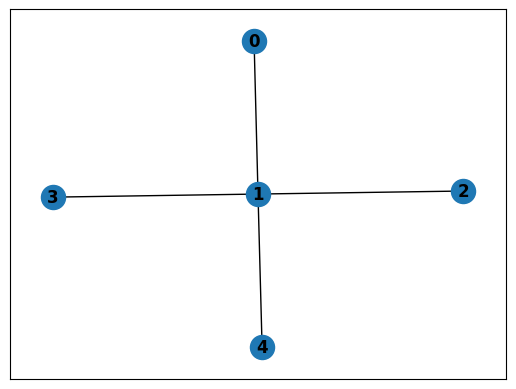

In [9]:
# Creating an empty graph
G = nx.Graph()

# Adding nodes
num_nodes = graph_data1.num_nodes
G.add_nodes_from(range(num_nodes))

# Adding edges
G.add_edges_from(edges)

# Positioning nodes using spring layout
pos = nx.spring_layout(G)

# Drawing graph
nx.draw_networkx(G, pos, with_labels = True, font_weight = "bold")

# Showing plot
plt.show()

Besides holding a number of node-level, edge-level or graph-level attributes, Data provides a number of useful utility functions, e.g.:

In [10]:
graph_data1.keys()

['x', 'edge_index']

In [11]:
graph_data1['x']

tensor([[ 1.,  0.],
        [ 0.,  1.],
        [-1.,  2.],
        [ 2.,  0.],
        [ 1., -1.]])

In [12]:
graph_data1["edge_index"]

tensor([[0, 1, 1, 2, 1, 3, 1, 4],
        [1, 0, 2, 1, 3, 1, 4, 1]])

In [13]:
graph_data1.num_nodes

5

In [14]:
graph_data1.num_edges

8

In [15]:
graph_data1.num_node_features

2

In [16]:
graph_data1.has_isolated_nodes()

False

In [17]:
graph_data1.has_self_loops()

False

In [18]:
graph_data1.is_directed()

False

In [19]:
graph_data1.edge_index

tensor([[0, 1, 1, 2, 1, 3, 1, 4],
        [1, 0, 2, 1, 3, 1, 4, 1]])

Creating adjacency matrix single dense batched adjacency matrix for the graph.
https://pytorch-geometric.readthedocs.io/en/latest/modules/utils.html#torch_geometric.utils.to_dense_adj

#### Convert edge index to dense adjacency matrix

In [20]:
from torch_geometric.utils import to_dense_adj

adjacency_matrix = to_dense_adj(graph_data1.edge_index)

print(adjacency_matrix)

tensor([[[0., 1., 0., 0., 0.],
         [1., 0., 1., 1., 1.],
         [0., 1., 0., 0., 0.],
         [0., 1., 0., 0., 0.],
         [0., 1., 0., 0., 0.]]])


Now we are creating a simple graph with isolated nodes and also having self loop

In [21]:
edge_index = torch.tensor([[0, 1],
                           [1, 0],
                           [1, 2],
                           [2, 1],
                           [3, 4],
                           [5, 5]], dtype = torch.long)

x = torch.tensor([[1, 0], [0, 1], [-1, 2], [2, 0], [1, -1], [2, -2]], dtype = torch.float)

graph_data2 = Data(x = x, edge_index = edge_index.t().contiguous())

graph_data2

Data(x=[6, 2], edge_index=[2, 6])

Plotting the Graph

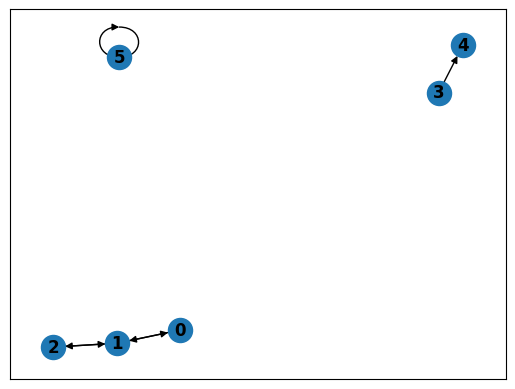

In [23]:
# Creating an empty graph
G = nx.DiGraph()

# Addding nodes
num_nodes = graph_data2.num_nodes
G.add_nodes_from(range(num_nodes))

# Adding edges
edges = [(graph_data2.edge_index[0, i].item(), graph_data2.edge_index[1, i].item())
             for i in range(graph_data2.edge_index.size(1))]
G.add_edges_from(edges)

# Positioning nodes using spring layout
pos = nx.spring_layout(G)

# Drawing graph
nx.draw_networkx(G, pos, with_labels = True, font_weight = "bold")

# Showing plot
plt.show()

In [24]:
graph_data2.num_nodes

6

In [25]:
graph_data2.num_edges

6

In [26]:
graph_data2.num_node_features

2

Verifying presence of isolated nodes

In [27]:
graph_data2.has_isolated_nodes()

True

Verifying presence of self loops

In [28]:
graph_data2.has_self_loops()

True

Also the graph is directed (3 to 4)

In [29]:
graph_data2.is_directed()

True

Downloading bench mark datasets from torch geometric. Ref-doc-link-
https://pytorch-geometric.readthedocs.io/en/latest/get_started/introduction.html#common-benchmark-datasets

https://graphsandnetworks.com/the-cora-dataset/

The Cora dataset consists of 2708 scientific publications classified into one of seven classes. The citation network consists of 5429 links. Each publication in the dataset is described by a 0/1-valued word vector indicating the absence/presence of the corresponding word from the dictionary. The dictionary consists of 1433 unique words.

In [30]:
from torch_geometric.datasets import Planetoid

cora_dataset = Planetoid(root = "Cora_data", name = "Cora")

cora_dataset

Processing...
Done!


Cora()

In [31]:
len(cora_dataset)

1

In [32]:
cora_dataset.url

'https://github.com/kimiyoung/planetoid/raw/master/data'

Seven classes of nodes - {'Case_Based',
 'Genetic_Algorithms',
 'Neural_Networks',
 'Probabilistic_Methods',
 'Reinforcement_Learning',
 'Rule_Learning',
 'Theory'}

In [33]:
cora_dataset.num_classes

7

In [34]:
cora_dataset.num_features

1433

In [35]:
cora_graph = cora_dataset[0]

cora_graph

Data(x=[2708, 1433], edge_index=[2, 10556], y=[2708], train_mask=[2708], val_mask=[2708], test_mask=[2708])

In [36]:
cora_graph.x

tensor([[0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        ...,
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.]])

In [38]:
cora_graph.edge_index

tensor([[ 633, 1862, 2582,  ...,  598, 1473, 2706],
        [   0,    0,    0,  ..., 2707, 2707, 2707]])

In [39]:
cora_graph.edge_index.shape

torch.Size([2, 10556])

In [40]:
cora_graph.y

tensor([3, 4, 4,  ..., 3, 3, 3])

This time, the Data objects holds a label for each node, and additional node-level attributes: train_mask, val_mask and test_mask, where

train_mask denotes against which nodes to train (140 nodes),

val_mask denotes which nodes to use for validation, e.g., to perform early stopping (500 nodes),

test_mask denotes against which nodes to test (1000 nodes).

In [41]:
cora_graph.train_mask.sum().item(), cora_graph.val_mask.sum().item(), cora_graph.test_mask.sum().item()

(140, 500, 1000)

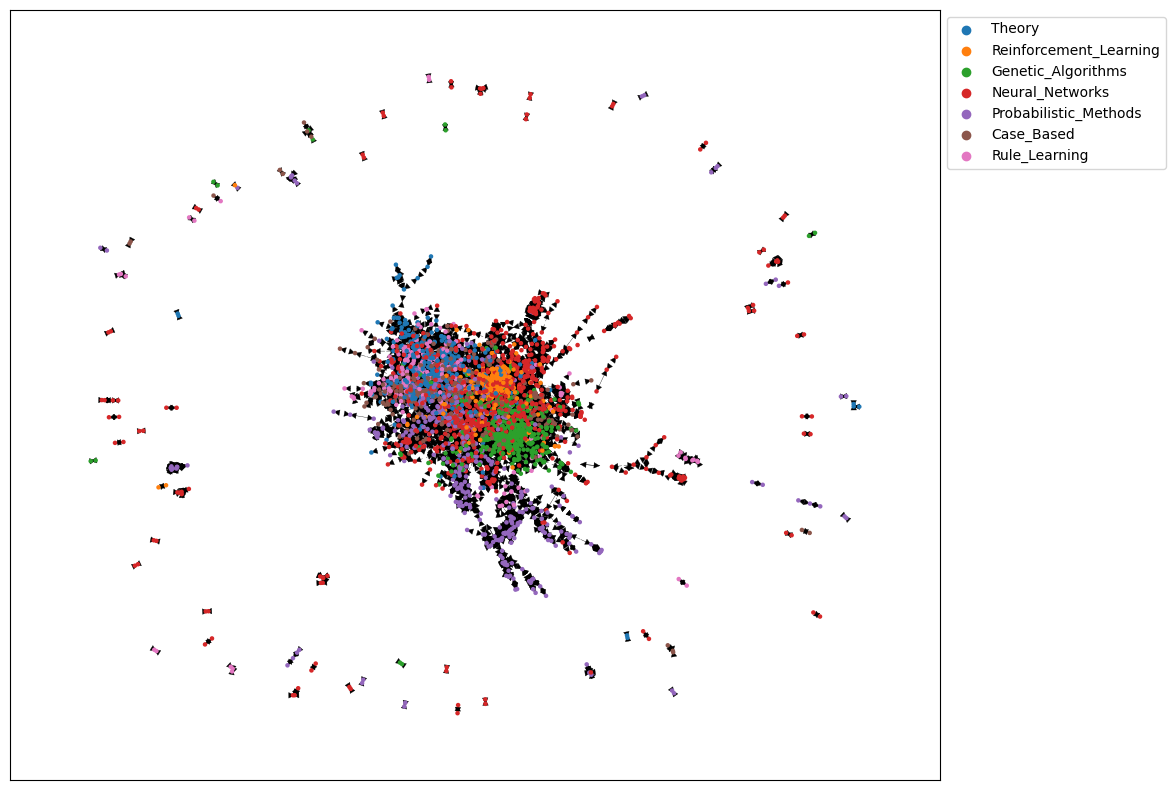

In [42]:
from torch_geometric.utils import to_networkx

# Define label names and colors
label_dict = {
    0: "Theory",
    1: "Reinforcement_Learning",
    2: "Genetic_Algorithms",
    3: "Neural_Networks",
    4: "Probabilistic_Methods",
    5: "Case_Based",
    6: "Rule_Learning"
}

colorlist = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2']

# Convert PyG graph to NetworkX graph
G = to_networkx(cora_graph, to_undirected = False)

# Prepare node colors and legends
node_color = [colorlist[int(label)] for label in cora_graph.y]
labellist = [label_dict[int(label)] for label in cora_graph.y]

# Plot the graph
pos = nx.spring_layout(G, seed = 123)
plt.figure(figsize = (12, 10))
nx.draw_networkx_nodes(G, pos, node_size = 5, node_color = node_color)
nx.draw_networkx_edges(G, pos, width = 0.25)

# Add legends
for label, color in zip(label_dict.values(), colorlist):
    plt.scatter([], [], c = color, label = label)

plt.legend(bbox_to_anchor = (1, 1), loc = "upper left")

plt.show()


Now we are loading another dataset from TUD.
https://chrsmrrs.github.io/datasets/docs/datasets/
PROTEINS is a dataset of proteins that are classified as enzymes or non-enzymes. Nodes represent the amino acids and two nodes are connected by an edge if they are less than 6 Angstroms apart.

In [43]:
from torch_geometric.datasets import TUDataset

proteins_dataset = TUDataset(root = "Proteins", name = "PROTEINS_full")

proteins_dataset

Processing...
Done!


PROTEINS_full(1113)

1113 graphs are there within 2 classes(Enzymes or Non-Enzymes)

In [44]:
len(proteins_dataset)

1113

In [45]:
proteins_dataset.num_classes

2

In [46]:
proteins_dataset.num_node_features

3

In [47]:
graph_protein = proteins_dataset[0]

graph_protein

Data(edge_index=[2, 162], x=[42, 3], y=[1])

In [48]:
graph_protein.is_undirected()

True

Neural networks are usually trained in a batch-wise fashion. PyG achieves parallelization over a mini-batch by creating sparse block diagonal adjacency matrices (defined by edge_index) and concatenating feature and target matrices in the node dimension. This composition allows differing number of nodes and edges over examples in one batch.

Ref-doc-link-https://pytorch-geometric.readthedocs.io/en/latest/get_started/introduction.html#mini-batches

In [49]:
from torch_geometric.loader import DataLoader

protein_loader = DataLoader(proteins_dataset, batch_size = 32, shuffle = True)

for batch in protein_loader:
    print(batch)

DataBatch(edge_index=[2, 4488], x=[1143, 3], y=[32], batch=[1143], ptr=[33])
DataBatch(edge_index=[2, 4300], x=[1145, 3], y=[32], batch=[1145], ptr=[33])
DataBatch(edge_index=[2, 6710], x=[1864, 3], y=[32], batch=[1864], ptr=[33])
DataBatch(edge_index=[2, 3124], x=[826, 3], y=[32], batch=[826], ptr=[33])
DataBatch(edge_index=[2, 4166], x=[1106, 3], y=[32], batch=[1106], ptr=[33])
DataBatch(edge_index=[2, 4516], x=[1242, 3], y=[32], batch=[1242], ptr=[33])
DataBatch(edge_index=[2, 4618], x=[1177, 3], y=[32], batch=[1177], ptr=[33])
DataBatch(edge_index=[2, 3496], x=[923, 3], y=[32], batch=[923], ptr=[33])
DataBatch(edge_index=[2, 4492], x=[1163, 3], y=[32], batch=[1163], ptr=[33])
DataBatch(edge_index=[2, 4622], x=[1271, 3], y=[32], batch=[1271], ptr=[33])
DataBatch(edge_index=[2, 5434], x=[1540, 3], y=[32], batch=[1540], ptr=[33])
DataBatch(edge_index=[2, 4328], x=[1150, 3], y=[32], batch=[1150], ptr=[33])
DataBatch(edge_index=[2, 4248], x=[1151, 3], y=[32], batch=[1151], ptr=[33])
Dat

In [50]:
batch_proteins_data = next(iter(protein_loader))

batch_proteins_data

DataBatch(edge_index=[2, 3956], x=[1069, 3], y=[32], batch=[1069], ptr=[33])

Heterogenous graphs -
https://pytorch-geometric.readthedocs.io/en/latest/notes/heterogeneous.html...Creating a fake social network graph.
We define node features for two types of nodes: 'user' and 'post'.

We define edge indices for two types of relationships: 'follows' (between users), 'liked_by' (from posts to users), and 'posted_by' (from posts to users).

We create a HeteroData object and add node features and edge indices for each node and edge type using the appropriate keys.

In [51]:
from torch_geometric.data import HeteroData

num_users = 10
num_posts = 40

# Features for user nodes (10 nodes, 8 features each)
user_features = torch.randn(num_users, 8)

# Features for post nodes (40 nodes, 5 features each)
post_features = torch.randn(num_posts, 5)

follows_edges = torch.tensor([[0, 1], [1, 2], [2, 3], [3, 4], [4, 5]])
posted_by_edges = torch.tensor([[0, 1], [1, 0], [3, 1]])
liked_by_edges = torch.tensor([[3, 1], [5, 6], [6, 5], [4, 2]])

follows_features = torch.randn(follows_edges.shape[0], 3)
posted_by_features = torch.randn(posted_by_edges.shape[0], 2)
liked_by_features = torch.randn(liked_by_edges.shape[0], 1)

user_features

tensor([[-0.5753,  0.4135, -0.5536,  0.3705,  1.9680, -1.7476, -0.7603,  0.6284],
        [ 0.1650,  0.0300,  1.3078,  1.4851, -1.1668,  0.5513,  0.6604, -1.1673],
        [ 0.8552,  0.6902, -0.7866, -0.6122,  1.8114, -0.0517, -0.6013, -0.7685],
        [-0.3887, -0.6393,  0.4142,  0.1694,  1.0871, -2.3164,  1.3315,  0.5121],
        [-1.7566,  1.0258, -1.8393, -0.9446,  0.3543,  1.7097, -1.9072, -0.9847],
        [ 0.7458,  0.2564,  1.2768,  1.1300,  0.3895, -0.4797,  0.4839, -0.1432],
        [ 2.6087, -0.1221,  2.2552, -0.3660,  0.6699, -0.2522, -1.6585,  0.6862],
        [ 0.2659,  2.2547, -0.3065, -0.3278, -0.0584, -0.3045, -1.8595, -0.5305],
        [-0.0456, -0.4601,  0.1193, -0.4954, -2.4257,  1.5767,  0.4699,  0.7630],
        [-2.0546, -0.1949, -0.1527, -0.4508,  0.0684,  0.4001,  1.5812, -0.5335]])

In [52]:
post_features

tensor([[ 0.2268, -2.0988, -0.6495, -0.1159, -0.6536],
        [-1.2984,  1.5567, -0.3052,  0.6716, -0.3014],
        [-0.3749,  0.6077,  0.1203,  0.2089, -0.9424],
        [ 0.0739, -0.5775, -0.5993, -0.8698,  0.2112],
        [-0.8715,  0.5541, -0.3459, -0.1607,  0.1439],
        [ 0.9136, -0.9173, -0.7664, -0.3380,  0.0546],
        [ 0.7277, -0.7793, -1.7803, -0.6017,  1.8466],
        [-0.8109, -0.8449,  0.4762,  0.9944,  0.9838],
        [-0.9138,  1.3699,  0.1565, -1.0031, -0.1655],
        [-0.4881, -2.6250, -1.1881,  2.2043, -1.8433],
        [-1.6534,  0.9658, -1.0556,  0.1465,  1.9014],
        [-1.5366, -0.5795,  1.4370, -0.9298, -0.6138],
        [-0.3387,  1.9908,  1.5296, -1.6381, -0.7467],
        [-0.5490, -2.5229,  0.9488,  0.0713,  0.1135],
        [-1.3828,  1.2071,  0.5007, -1.0030, -1.2031],
        [-1.8469,  0.1501,  1.2818,  0.9519,  1.4426],
        [-0.7800,  0.6481,  0.9309, -0.5753,  0.2657],
        [-0.3110, -0.1523, -0.7661,  0.0226,  0.7612],
        [-

Defining edge indices and edge features for different types of relationships
For example, 'follows' edges between users,'posted_by'  and 'liked_by' edges from posts to users

In [53]:
# Create a HeteroData object
social_network_data = HeteroData()

# Add node features for each node type
social_network_data["user"].x = user_features
social_network_data["post"].x = post_features

# Transpose edge indices for correct orientation (num_edges, 2) -> (2. num_edges)
social_network_data["user", "follows", "user"].edge_index = follows_edges.t()
social_network_data["post", "posted_by", "user"].edge_index = posted_by_edges.t()
social_network_data["post", "liked_by", "user"].edge_index = liked_by_edges.t()

# Assign edge attributes
social_network_data["user", "follows", "user"].edge_attr = follows_features
social_network_data["post", "posted_by", "user"].edge_attr = posted_by_features
social_network_data["post", "liked_by", "user"].edge_attr = liked_by_features

print(social_network_data)

HeteroData(
  user={ x=[10, 8] },
  post={ x=[40, 5] },
  (user, follows, user)={
    edge_index=[2, 5],
    edge_attr=[5, 3],
  },
  (post, posted_by, user)={
    edge_index=[2, 3],
    edge_attr=[3, 2],
  },
  (post, liked_by, user)={
    edge_index=[2, 4],
    edge_attr=[4, 1],
  }
)


Downloading Movielens data

We are going to use the MovieLens dataset collected by the GroupLens research group. This toy dataset describes 5-star rating and tagging activity from MovieLens. The dataset contains approximately 100k ratings across more than 9k movies from more than 600 users. We are going to use this dataset to generate two node types holding data for movies and users, respectively, and one edge type connecting users and movies, representing the relation of how a user has rated a specific movie.

In [54]:
from torch_geometric.datasets import MovieLens

movielens_dataset = MovieLens(root = "Movielens")

movielens_dataset

Extracting Movielens/raw/ml-latest-small.zip
Processing...
/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/10.7k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/612 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/350 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

1_Pooling/config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

Batches:   0%|          | 0/305 [00:00<?, ?it/s]

Done!


MovieLens()

In [55]:
len(movielens_dataset)

1

In [56]:
movielens_graph = movielens_dataset[0]

movielens_graph

HeteroData(
  movie={ x=[9742, 404] },
  user={ num_nodes=610 },
  (user, rates, movie)={
    edge_index=[2, 100836],
    edge_label=[100836],
    time=[100836],
  }
)

Details can be extracted

In [57]:
movielens_graph["movie"]

{'x': tensor([[-0.0828,  0.0530,  0.0536,  ...,  0.0000,  0.0000,  0.0000],
        [-0.1053,  0.1508, -0.0264,  ...,  0.0000,  0.0000,  0.0000],
        [-0.0988,  0.0176, -0.0527,  ...,  0.0000,  0.0000,  0.0000],
        ...,
        [-0.1115,  0.0310, -0.0177,  ...,  0.0000,  0.0000,  0.0000],
        [ 0.0366,  0.0137,  0.0315,  ...,  0.0000,  0.0000,  0.0000],
        [-0.0500, -0.0141, -0.0031,  ...,  0.0000,  0.0000,  0.0000]])}

In [58]:
movielens_graph["user", "rates", "movie"]

{'edge_index': tensor([[   0,    0,    0,  ...,  609,  609,  609],
        [   0,    2,    5,  ..., 9462, 9463, 9503]]), 'edge_label': tensor([4, 4, 4,  ..., 5, 5, 3]), 'time': tensor([ 964982703,  964981247,  964982224,  ..., 1494273047, 1493846352,
        1493846415])}

Loading IMDB graph data-
Ref.doc-link-
https://docs.graphcore.ai/projects/tutorials/en/latest/pytorch_geometric/6_heterogeneous_graphs/README.html#introduction-to-heterogeneous-graphs

In [59]:
from torch_geometric.datasets import IMDB

imdb_dataset = IMDB(root = "IMDB")
imdb_dataset

Extracting IMDB/raw/IMDB_processed.zip
Processing...
Done!


IMDB()

Only one graph present

In [60]:
len(imdb_dataset)

1

This dataset is heterogenous

In [61]:
imdb_data = imdb_dataset[0]

imdb_data

HeteroData(
  movie={
    x=[4278, 3066],
    y=[4278],
    train_mask=[4278],
    val_mask=[4278],
    test_mask=[4278],
  },
  director={ x=[2081, 3066] },
  actor={ x=[5257, 3066] },
  (movie, to, director)={ edge_index=[2, 4278] },
  (movie, to, actor)={ edge_index=[2, 12828] },
  (director, to, movie)={ edge_index=[2, 4278] },
  (actor, to, movie)={ edge_index=[2, 12828] }
)